In [1]:
import pandas as pd
data=pd.read_csv('Iris.csv')

In [2]:
data=data.drop("PetalLengthCm",1)
data=data.drop("PetalWidthCm",1)

In [3]:
data=data[:100]

In [4]:
from sklearn import preprocessing

In [5]:
data2=preprocessing.scale(data[['SepalLengthCm','SepalWidthCm']])

In [6]:
import numpy as np 
species=np.zeros(100)
for i in range(100):
    if i>50:
        species[i]=1

In [7]:
species=species.astype('int32')

In [8]:
data22=pd.DataFrame(data2,columns=["SepalLengthCm","SepalWidthCm"])

In [9]:
data22['Species']=species

In [10]:
from sklearn.preprocessing import normalize
data3 = normalize(data2, axis=1, norm='l2')

In [11]:
data33=pd.DataFrame(data3,columns=["SepalLengthCm","SepalWidthCm"])

In [12]:
data33['Species']=species

In [13]:
data33

,SepalLengthCm,SepalWidthCm,Species
0,-0.561130,0.827728,0
1,-0.976253,-0.216634,0
2,-0.983258,0.182218,0
3,-0.999957,0.009285,0
4,-0.568235,0.822866,0
...,...,...,...
95,0.874992,-0.484137,1
96,0.658808,-0.752311,1
97,0.941273,-0.337646,1
98,-0.420418,-0.907331,1


In [14]:
data3

array([[-0.56112995,  0.82772772],
       [-0.97625296, -0.21663371],
       [-0.98325818,  0.18221788],
       [-0.99995689,  0.00928509],
       [-0.56823479,  0.82286646],
       [-0.06521177,  0.99787145],
       [-0.90378119,  0.42799481],
       [-0.7523028 ,  0.6588175 ],
       [-0.97146149, -0.23719732],
       [-0.99989971,  0.01416262],
       [-0.08659233,  0.99624383],
       [-0.85191444,  0.523681  ],
       [-0.98263417, -0.18555349],
       [-0.99419687, -0.10757597],
       [ 0.26012481,  0.965575  ],
       [ 0.12899612,  0.9916451 ],
       [-0.06521177,  0.99787145],
       [-0.56112995,  0.82772772],
       [ 0.23395669,  0.97224702],
       [-0.36322378,  0.93170193],
       [-0.1696385 ,  0.98550636],
       [-0.41352822,  0.9104913 ],
       [-0.78732614,  0.61653674],
       [-0.80059363,  0.59920768],
       [-0.85191444,  0.523681  ],
       [-0.96566769, -0.25978052],
       [-0.7523028 ,  0.6588175 ],
       [-0.44376146,  0.89614495],
       [-0.54910383,

In [15]:
data3[60]

array([-0.30425515, -0.95259058])

In [16]:
x=data3[:,0]
y=data3[:,1]

In [17]:
angles=np.array(2*np.arctan2(y,x))

In [18]:
angles[85]

1.324502159059016

In [19]:
angles

array([ 4.33309323, -5.84645537,  5.91670206,  6.26461485,  4.3503108 ,
        3.27210881,  5.39863943,  4.84469363, -5.80422567,  6.25485913,
        3.31499448,  5.18085312, -5.9099151 , -6.06761621,  2.61528972,
        2.88287951,  3.27210881,  4.33309323,  2.66930197,  3.88504399,
        3.48251833,  3.99424414,  4.95451266,  4.99816316,  5.18085312,
       -5.75759549,  4.84469363,  4.06117609,  4.30417579,  5.91670206,
        6.25908017,  3.48251833,  3.53609108,  3.10269296,  6.25485913,
        5.69411412,  3.03571019,  6.25485913, -6.04766612,  4.60662303,
        4.56287346, -4.61520468,  6.01793162,  4.56287346,  3.88504399,
       -5.9099151 ,  3.88504399,  5.9579942 ,  3.55431201,  5.21778966,
        0.18635494,  0.30521246,  0.01131922, -3.08741386, -0.73523876,
       -2.09364347,  0.64641613, -4.23763552, -0.45521661, -4.08525434,
       -3.75990547, -0.5743775 , -2.31428614, -0.78800451, -2.22503712,
        0.01316119, -1.55286032, -2.03235166, -2.05349299, -2.82

In [20]:
dataframe_anges=pd.DataFrame(angles)

In [21]:
dataframe_anges
dataframe_anges.to_excel("gwnies.xlsx")  

In [22]:
from collections import OrderedDict

In [23]:
def circuit(angles1):
    from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
    qbits=QuantumRegister(4)
    cbits=ClassicalRegister(4)
    qc=QuantumCircuit(qbits,cbits)
    qc.h(qbits[0])
    qc.h(qbits[1])
    qc.barrier()
    qc.cry(angles1,qbits[0],qbits[2])
    qc.barrier()
    qc.x(qbits[0])
    qc.barrier()
    qc.ccx(qbits[0],qbits[1],qbits[2])
    qc.barrier()
    qc.x(qbits[1])
    qc.barrier()
    qc.ccx(qbits[0],qbits[1],qbits[2])
    qc.cry(-0.662,qbits[1],qbits[2])
    qc.ccx(qbits[0],qbits[1],qbits[2])
    qc.cry(0.662,qbits[1],qbits[2])
    qc.cx(qbits[1],qbits[3])
    qc.barrier()
    qc.h(qbits[0])
    qc.barrier()
    qc.measure(qbits,cbits)
    shots = 4000
    qmlResult = execute(qc, backend = BasicAer.get_backend('qasm_simulator'), shots = shots)
    qmlCounts = qmlResult.result().get_counts(qc)
    for _ in qmlCounts:
       qmlCounts[_] = qmlCounts[_] / shots
    qmlProbabilities = OrderedDict(sorted(qmlCounts.items()))
    return qmlProbabilities 

In [24]:
circuit(angles[99])

OrderedDict([('0000', 0.03725),
             ('0001', 0.035),
             ('0100', 0.00225),
             ('0101', 0.425),
             ('1010', 0.2075),
             ('1011', 0.011),
             ('1110', 0.01025),
             ('1111', 0.27175)])

In [25]:
lst=[]
for i in range(0,100):
    lst.append(circuit(angles[i]))

In [26]:
lst

[OrderedDict([('0000', 0.04675),
              ('0001', 0.041),
              ('0100', 0.40675),
              ('0101', 0.005),
              ('1010', 0.00875),
              ('1011', 0.2295),
              ('1110', 0.256),
              ('1111', 0.00625)]),
 OrderedDict([('0000', 0.12325),
              ('0001', 0.12575),
              ('0100', 0.07425),
              ('0101', 0.1775),
              ('1010', 0.00475),
              ('1011', 0.3865),
              ('1110', 0.023),
              ('1111', 0.085)]),
 OrderedDict([('0000', 0.12525),
              ('0001', 0.1265),
              ('0100', 0.166),
              ('0101', 0.083),
              ('1010', 0.005),
              ('1011', 0.39125),
              ('1110', 0.08425),
              ('1111', 0.01875)]),
 OrderedDict([('0000', 0.127),
              ('0001', 0.13425),
              ('0100', 0.1385),
              ('0101', 0.1205),
              ('1010', 0.00475),
              ('1011', 0.38525),
              ('1110', 0.045

In [27]:
df = pd.DataFrame(lst) 


In [28]:
df.to_csv("output2.csv")  

In [29]:
df=df.T

In [30]:
df.fillna(0,inplace=True)

In [31]:
df.to_csv("output3.csv")  

In [32]:
x=df.index

In [33]:
df.drop([x[1],x[3],x[5],x[7]],inplace=True)

In [34]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0000,0.04675,0.12325,0.12525,0.12700,0.04050,0.00075,0.10125,0.07525,0.12150,0.12200,...,0.00000,0.11925,0.02150,0.01800,0.00600,0.09000,0.05225,0.10725,0.02325,0.03050
0100,0.40675,0.07425,0.16600,0.13850,0.43600,0.49600,0.25000,0.34375,0.07275,0.12625,...,0.00000,0.07575,0.00100,0.00100,0.00000,0.03275,0.00825,0.05625,0.00125,0.00225
1010,0.00875,0.00475,0.00500,0.00475,0.00525,0.06825,0.00175,0.00025,0.00475,0.00475,...,0.08350,0.39400,0.19425,0.01525,0.12550,0.34550,0.26375,0.38475,0.01850,0.20200
1110,0.25600,0.02300,0.08425,0.04550,0.24950,0.33000,0.13375,0.20200,0.01775,0.05200,...,0.02375,0.02300,0.01200,0.00750,0.01525,0.00300,0.00275,0.01050,0.00975,0.00850


In [35]:
df.to_excel("output1.xlsx")  

In [36]:
df_2=pd.DataFrame(data=[sum(df.loc[:][0]),sum(df.loc[[df.index[0],df.index[1]]][0]),sum(df.loc[[df.index[0],df.index[1]]][0])/sum(df.loc[:][0])],columns=['Sample-0'],index=['Postselective-measurment','Prob-last-is-zero','Prob-of-class-0'])

In [37]:
for i in range(1,len(df.columns)):
    df_2['Sample-'+str(i)]=[sum(df.loc[:][i]),sum(df.loc[[df.index[0],df.index[1]]][i]),sum(df.loc[[df.index[0],df.index[1]]][i])/sum(df.loc[:][i])]

In [38]:
df_2.to_excel("probs.xlsx")  

In [39]:
df3=df_2.T

In [40]:
df3.to_excel("probs.xlsx")  

In [41]:
df_2

,Sample-0,Sample-1,Sample-2,Sample-3,Sample-4,Sample-5,Sample-6,Sample-7,Sample-8,Sample-9,...,Sample-90,Sample-91,Sample-92,Sample-93,Sample-94,Sample-95,Sample-96,Sample-97,Sample-98,Sample-99
Postselective-measurment,0.718250,0.225250,0.38050,0.315750,0.731250,0.895000,0.486750,0.621250,0.216750,0.305000,...,0.10725,0.612000,0.228750,0.04175,0.146750,0.471250,0.327000,0.558750,0.052750,0.243250
Prob-last-is-zero,0.453500,0.197500,0.29125,0.265500,0.476500,0.496750,0.351250,0.419000,0.194250,0.248250,...,0.00000,0.195000,0.022500,0.01900,0.006000,0.122750,0.060500,0.163500,0.024500,0.032750
Prob-of-class-0,0.631396,0.876804,0.76544,0.840855,0.651624,0.555028,0.721623,0.674447,0.896194,0.813934,...,0.00000,0.318627,0.098361,0.45509,0.040886,0.260477,0.185015,0.292617,0.464455,0.134635


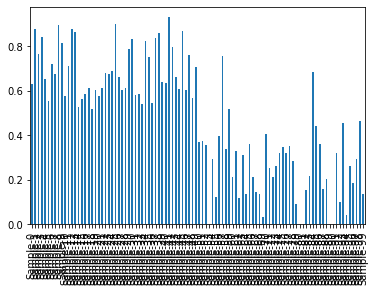

In [42]:
df_2.iloc[2].plot(kind='bar',x='name',y='age')


In [43]:
 for i in range(0,99):
        if df_2.iloc[2][i]>0.5:
            df_2.iloc[2][i]=-1
        else:
            df_2.iloc[2][i]=1

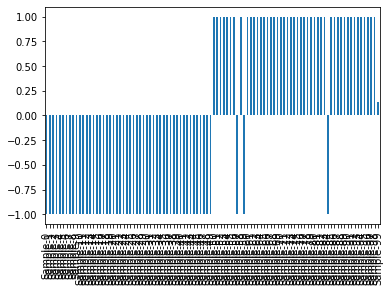

In [53]:
df_2.iloc[2].plot(kind='bar')